# Task 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('bank-additional-full.csv', sep=';')

print("Basic Statistical Information:")
print(data.describe())
print("\nDataset Dimensions:")
print(data.shape)

In [2]:
# Task 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('bank-additional-full.csv', sep=';')

print("Basic Statistical Information:")
print(data.describe())
print("\nDataset Dimensions:")
print(data.shape)

Basic Statistical Information:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960    

# Task 2

In [3]:
print("\nUnique values in target variable 'y':", data['y'].unique())


data['y'] = data['y'].map({'yes': 1, 'no': 0})
print("\nAfter Encoding Target Variable 'y':")
print(data['y'].value_counts())


Unique values in target variable 'y': ['no' 'yes']

After Encoding Target Variable 'y':
y
0    36548
1     4640
Name: count, dtype: int64


# Task 3

In [4]:
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]


for column in bank_client.columns:
    print(f"\nUnique values in {column}:")
    print(bank_client[column].unique())

    import matplotlib.pyplot as plt
    import seaborn as sns


Unique values in age:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Unique values in job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in marital:
['married' 'single' 'divorced' 'unknown']

Unique values in education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in default:
['no' 'unknown' 'yes']

Unique values in housing:
['no' 'yes' 'unknown']

Unique values in loan:
['no' 'yes' 'unknown']


# Task 4


Age Analysis:
Maximum Age: 98
Minimum Age: 17

Missing Values in 'Age': 0


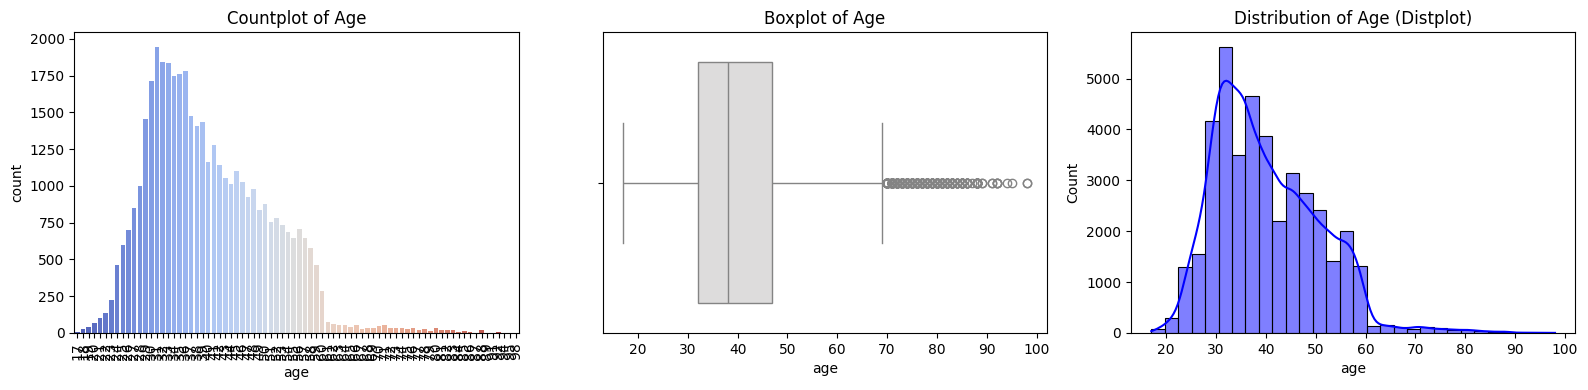

In [5]:
    
    import matplotlib.pyplot as plt
    import seaborn as sns

    
    print("\nAge Analysis:")
    
    
    
    print(f"Maximum Age: {bank_client['age'].max()}")
    print(f"Minimum Age: {bank_client['age'].min()}")

    print(f"\nMissing Values in 'Age': {bank_client['age'].isnull().sum()}")

    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.countplot(x=bank_client['age'], palette="coolwarm")
    plt.title("Countplot of Age")
    plt.xticks(rotation=90)

    plt.subplot(1, 3, 2)
    sns.boxplot(x=bank_client['age'], palette="coolwarm")
    plt.title("Boxplot of Age")

    plt.subplot(1, 3, 3)
    sns.histplot(bank_client['age'], bins=30, kde=True, color='blue')
    plt.title("Distribution of Age (Distplot)")

    plt.tight_layout()
    plt.show()

# Task 5

In [6]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquartile range manually.

    df: pd.DataFrame - dataset to analyze
    column: str - target column
    low_percentile: int - lower bound percentile (0-100)
    high_percentile: int - upper bound percentile (0-100)

    returns: pd.DataFrame with detected outliers
    """

    sorted_data = np.sort(df[column])

    #Calculate Q1 and Q3
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)

    print('')
    print(f"Q1 ({low_percentile} percentile) of the given data: {Q1}")
    print(f"Q3 ({high_percentile} percentile) of the given data: {Q3}")
    print('----------------------------------------------------------')


    IQR = Q3 - Q1
    print(f"Interquartile Range (IQR): {IQR}")
    print('----------------------------------------------------------')

    #calculate lower and upper bounds
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    print(f"Lower bound: {low_lim}")
    print(f"Upper bound: {up_lim}")
    print('----------------------------------------------------------')

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]

    print(f"Outliers detected in '{column}':")
    print(outliers)  # Replacing display(outliers) with print(outliers)

    return outliers

outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 (10 percentile) of the given data: 28.0
Q3 (90 percentile) of the given data: 55.0
----------------------------------------------------------
Interquartile Range (IQR): 27.0
----------------------------------------------------------
Lower bound: -12.5
Upper bound: 95.5
----------------------------------------------------------
Outliers detected in 'age':
       age      job  marital education  default housing loan
38452   98  retired  married  basic.4y  unknown     yes   no
38455   98  retired  married  basic.4y  unknown     yes   no


# Task 6

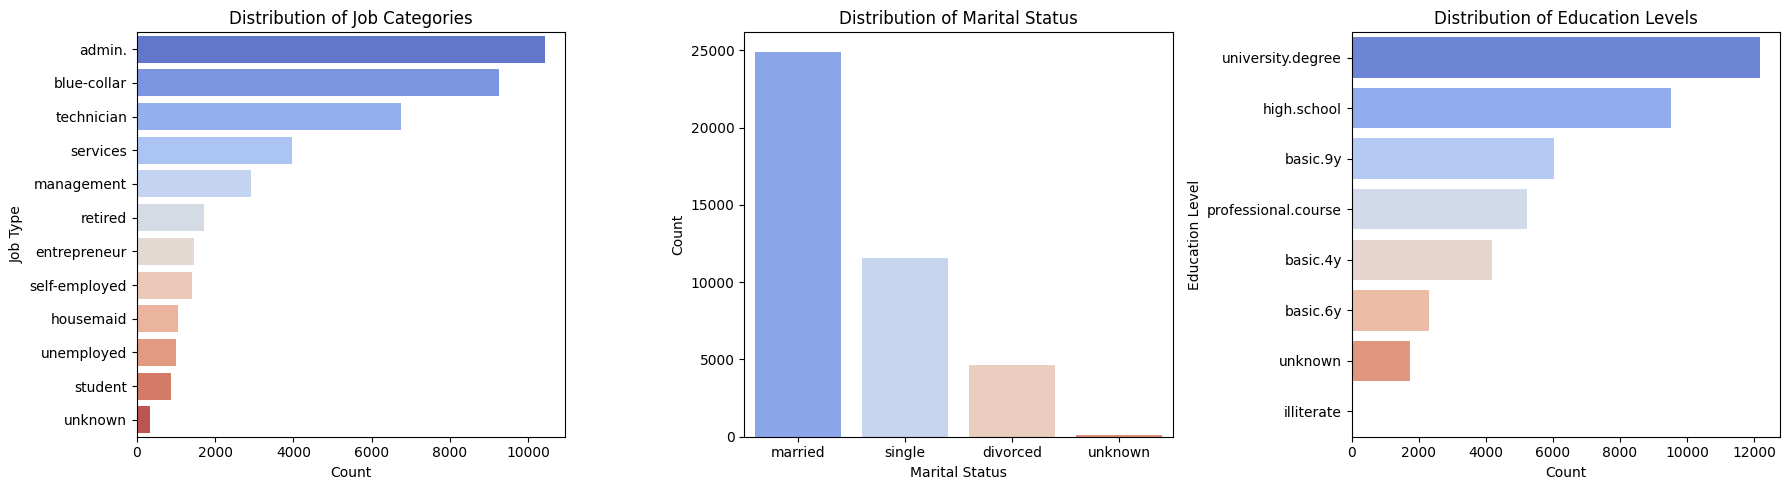

In [7]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(y=bank_client['job'], order=bank_client['job'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Job Categories")
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.subplot(1, 3, 2)
sns.countplot(x=bank_client['marital'], palette="coolwarm")
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.subplot(1, 3, 3)
sns.countplot(y=bank_client['education'], order=bank_client['education'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Education Levels")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()

# Task 7

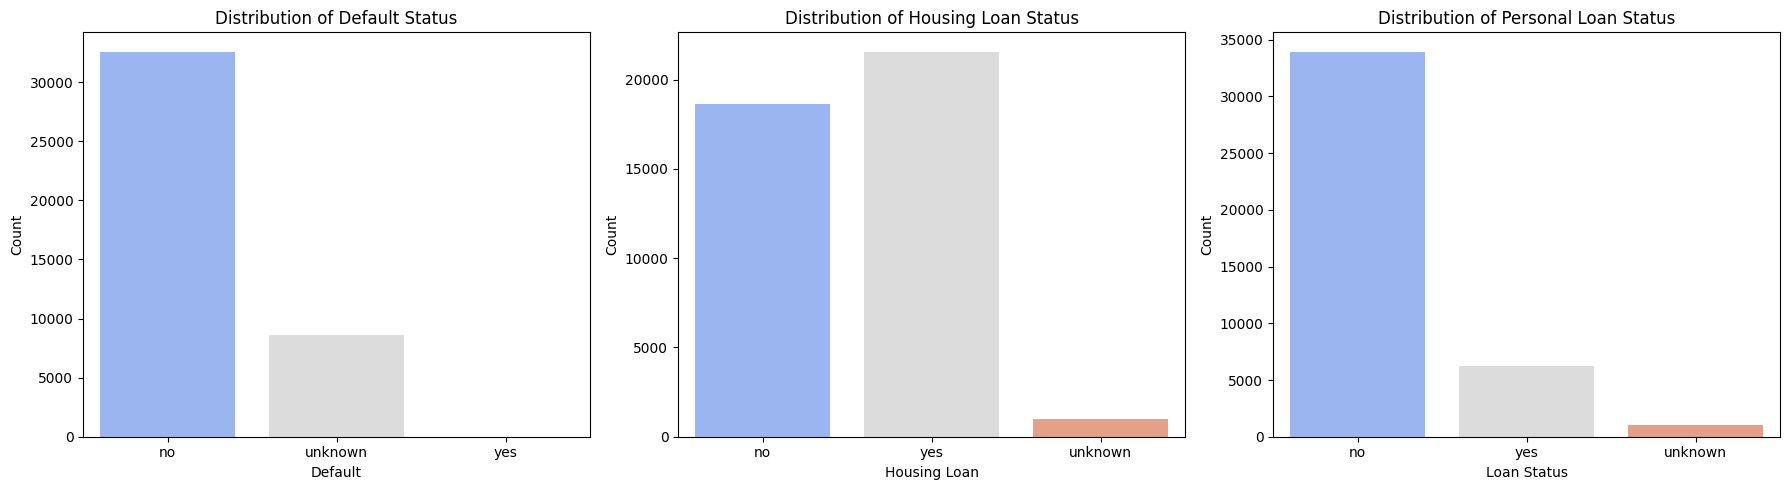

In [8]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(x=bank_client['default'], palette="coolwarm")
plt.title("Distribution of Default Status")
plt.xlabel("Default")
plt.ylabel("Count")
plt.subplot(1, 3, 2)
sns.countplot(x=bank_client['housing'], palette="coolwarm")
plt.title("Distribution of Housing Loan Status")
plt.xlabel("Housing Loan")
plt.ylabel("Count")


plt.subplot(1, 3, 3)
sns.countplot(x=bank_client['loan'], palette="coolwarm")
plt.title("Distribution of Personal Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

from sklearn.preprocessing import LabelEncoder

#Task 8, 9

In [9]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder

    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode

    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()] 
        df[col] = le.fit_transform(not_null)  

    return df



bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing', 'loan'])
print(bank_client.head())

def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column using quartiles

    df: pd.DataFrame to encode
    age_col: age column to encode

    returns: pd.DataFrame with transformed age values
    """

    dataframe['age_group'] = pd.qcut(dataframe[age_col], q=4, labels=[1, 2, 3, 4])
    dataframe = dataframe.drop(columns=[age_col])

    return dataframe

bank_client = encode_age(bank_client, 'age')
print(bank_client.head())

   age  job  marital  education  default  housing  loan
0   56    3        1          0        0        0     0
1   57    7        1          3        1        0     0
2   37    7        1          3        0        2     0
3   40    0        1          1        0        0     0
4   56    7        1          3        0        0     2
   job  marital  education  default  housing  loan age_group
0    3        1          0        0        0     0         4
1    7        1          3        1        0     0         4
2    7        1          3        0        2     0         2
3    0        1          1        0        0     0         3
4    7        1          3        0        0     2         4


# Task 10

In [10]:
bank_relat = data[['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
print("Client-Bank Contact DataFrame:")
print(bank_relat.head())
print("\nMissing Values in Client-Bank Contact Attributes:")
print(bank_relat.isnull().sum())

Client-Bank Contact DataFrame:
     contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         mon       261         1    999         0   
1  telephone   may         mon       149         1    999         0   
2  telephone   may         mon       226         1    999         0   
3  telephone   may         mon       151         1    999         0   
4  telephone   may         mon       307         1    999         0   

      poutcome  
0  nonexistent  
1  nonexistent  
2  nonexistent  
3  nonexistent  
4  nonexistent  

Missing Values in Client-Bank Contact Attributes:
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


# Task 11

In [11]:
for column in ['contact', 'month', 'day_of_week']:
    print(f"\nUnique values in '{column}': {bank_relat[column].unique()}")


Unique values in 'contact': ['telephone' 'cellular']

Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values in 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


# Task 12

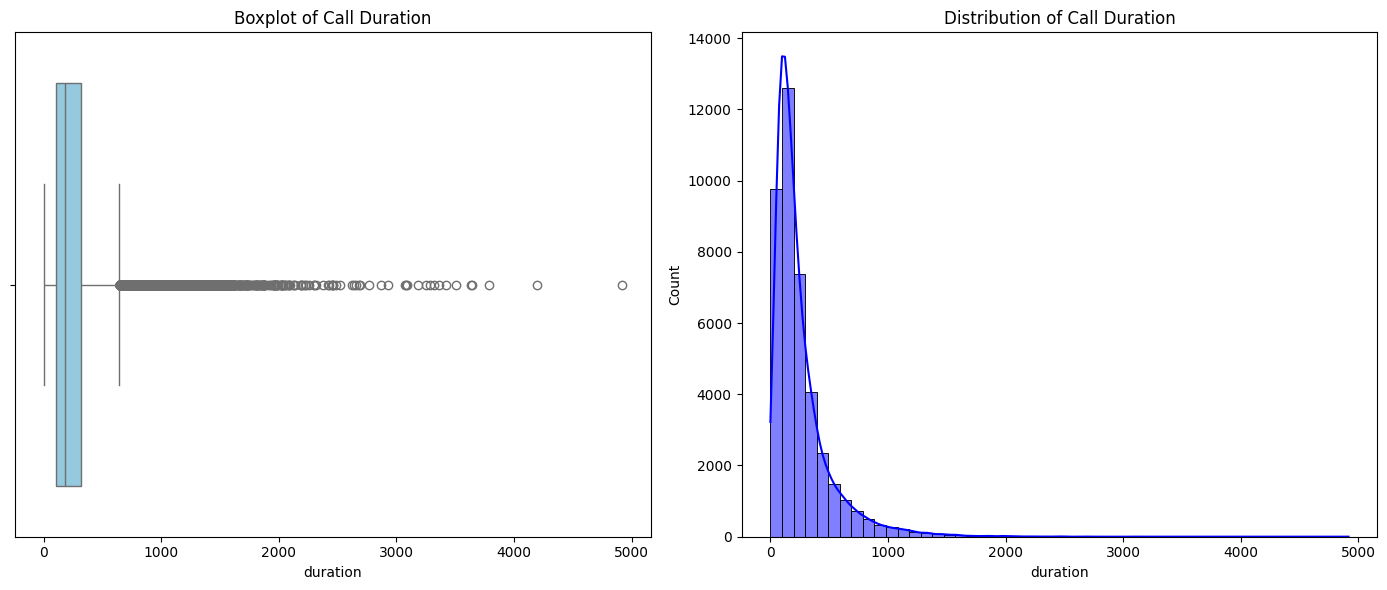

In [12]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=bank_relat['duration'], color='skyblue')
plt.title("Boxplot of Call Duration")
plt.subplot(1, 2, 2)
sns.histplot(bank_relat['duration'], bins=50, kde=True, color='blue')
plt.title("Distribution of Call Duration")

plt.tight_layout()
plt.show()

# Task 13

In [13]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
print(bank_relat.head())

   contact  month  day_of_week  duration  campaign  pdays  previous  \
0        1      6            1       261         1    999         0   
1        1      6            1       149         1    999         0   
2        1      6            1       226         1    999         0   
3        1      6            1       151         1    999         0   
4        1      6            1       307         1    999         0   

      poutcome  
0  nonexistent  
1  nonexistent  
2  nonexistent  
3  nonexistent  
4  nonexistent  


# Task 14

In [14]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding 'duration' column into quartiles.

    dataframe: pd.DataFrame to encode
    duration_col: column name for duration

    returns: transformed DataFrame
    """
    dataframe['duration_group'] = pd.qcut(dataframe[duration_col], q=4, labels=[1, 2, 3, 4])
    dataframe = dataframe.drop(columns=[duration_col])

    return dataframe



bank_relat = encode_duration(bank_relat, 'duration')
print(bank_relat.head())

   contact  month  day_of_week  campaign  pdays  previous     poutcome  \
0        1      6            1         1    999         0  nonexistent   
1        1      6            1         1    999         0  nonexistent   
2        1      6            1         1    999         0  nonexistent   
3        1      6            1         1    999         0  nonexistent   
4        1      6            1         1    999         0  nonexistent   

  duration_group  
0              3  
1              2  
2              3  
3              2  
4              3  


# Task 15

In [15]:
bank_socec = data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
print("Social and Economic Context DataFrame:")
print(bank_socec.head())
print("\nMissing Values in Social and Economic Attributes:")
print(bank_socec.isnull().sum())

Social and Economic Context DataFrame:
   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0

Missing Values in Social and Economic Attributes:
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


# Task 16

In [16]:
bank_other = data[['campaign', 'pdays', 'previous', 'poutcome']]
print("Other Attributes DataFrame:")
print(bank_other.head())
print("\nMissing Values in Other Attributes:")
print(bank_other.isnull().sum())

Other Attributes DataFrame:
   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent

Missing Values in Other Attributes:
campaign    0
pdays       0
previous    0
poutcome    0
dtype: int64


# Task 17

In [17]:
bank_other['poutcome'] = bank_other['poutcome'].map({'nonexistent': 0, 'failure': 1, 'success': 2})
print("\nTransformed 'poutcome' Attribute:")
print(bank_other['poutcome'].value_counts())
from sklearn.preprocessing import LabelEncoder


Transformed 'poutcome' Attribute:
poutcome
0    35563
1     4252
2     1373
Name: count, dtype: int64


# Task 18, 19,20

In [18]:
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)


print("Checking for non-numeric columns in bank_final:")
non_numeric_cols = bank_final.select_dtypes(include=['object']).columns
print("Non-numeric columns:", list(non_numeric_cols))

if 'poutcome' in non_numeric_cols:
    print("\nChecking 'poutcome' column before encoding:")
    print(bank_final['poutcome'].head())
    print("Data type of 'poutcome':", bank_final.dtypes['poutcome'])
    if pd.api.types.is_numeric_dtype(bank_final['poutcome']):
        non_numeric_cols = [col for col in non_numeric_cols if col != 'poutcome']

def encode_categorical_columns(df, categorical_cols):
    """
    Encodes categorical columns using LabelEncoder.

    df: DataFrame with categorical variables
    categorical_cols: List of column names to encode

    returns: DataFrame with encoded values
    """
    le = LabelEncoder()

    for col in categorical_cols:
        if df[col].ndim == 1:
            df[col] = le.fit_transform(df[col].astype(str))
        else:
            print(f"Skipping column {col} because it is not 1D.")
    return df

if len(non_numeric_cols) > 0:
    # Use the corrected function to process each column
    bank_final = encode_categorical_columns(bank_final, non_numeric_cols)


print("Final DataFrame Structure:")
print(bank_final.info())

def prepare_data_for_training(X: pd.DataFrame, target: pd.Series, test_size: float, n_splits: int, random_state: int):
    """
    Splits the data into train/test sets and applies K-Fold cross-validation.

    X: Feature DataFrame (must be numeric)
    target: Target variable (binary classification)
    test_size: Proportion of test dataset
    n_splits: Number of K-Fold splits
    random_state: Random seed

    returns: X_train, X_test, y_train, y_test, k_fold
    """
    X = X.apply(pd.to_numeric, errors='coerce')

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, stratify=target)

    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, data['y'], 0.2, 10, 101)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

def scale_the_data(X_train: pd.DataFrame, X_test: pd.DataFrame):
    """
    Standardizes features by removing the mean and scaling to unit variance.

    X_train: Training feature set
    X_test: Testing feature set

    returns: Scaled X_train and X_test
    """
    sc_X = StandardScaler()

    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

X_train, X_test = scale_the_data(X_train, X_test)


from sklearn.impute import SimpleImputer

from sklearn import model_selection

Checking for non-numeric columns in bank_final:
Non-numeric columns: ['poutcome']

Checking 'poutcome' column before encoding:
      poutcome  poutcome
0  nonexistent         0
1  nonexistent         0
2  nonexistent         0
3  nonexistent         0
4  nonexistent         0
Data type of 'poutcome': poutcome    object
poutcome     int64
dtype: object
Skipping column poutcome because it is not 1D.
Final DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             41188 non-null  int64   
 1   marital         41188 non-null  int64   
 2   education       41188 non-null  int64   
 3   default         41188 non-null  int64   
 4   housing         41188 non-null  int64   
 5   loan            41188 non-null  int64   
 6   age_group       41188 non-null  category
 7   contact         41188 non-null  int64   
 8 

# Task 21

In [19]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

logmodel = LogisticRegression()
logmodel.fit(X_train_imputed, y_train)

logpred = logmodel.predict(X_test_imputed)

print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, logpred))
print(f"Logistic Regression Accuracy: {round(accuracy_score(y_test, logpred) * 100, 2)}%")

LOGCV = cross_val_score(logmodel, X_test_imputed, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print(f"Logistic Regression Cross-Validation Score: {LOGCV:.2f}")

Confusion Matrix (Logistic Regression):
[[7135  175]
 [ 601  327]]
Logistic Regression Accuracy: 90.58%
Logistic Regression Cross-Validation Score: 0.90


# Task 22

k=1 Accuracy: 86.49% (+/- 0.52%)
k=2 Accuracy: 89.12% (+/- 0.51%)
k=3 Accuracy: 88.68% (+/- 0.60%)
k=4 Accuracy: 89.64% (+/- 0.49%)
k=5 Accuracy: 89.61% (+/- 0.48%)
k=6 Accuracy: 90.02% (+/- 0.49%)
k=7 Accuracy: 90.02% (+/- 0.46%)
k=8 Accuracy: 90.23% (+/- 0.45%)
k=9 Accuracy: 90.20% (+/- 0.41%)
k=10 Accuracy: 90.24% (+/- 0.41%)
k=11 Accuracy: 90.23% (+/- 0.43%)
k=12 Accuracy: 90.29% (+/- 0.45%)
k=13 Accuracy: 90.31% (+/- 0.52%)
k=14 Accuracy: 90.32% (+/- 0.52%)
k=15 Accuracy: 90.31% (+/- 0.51%)
k=16 Accuracy: 90.31% (+/- 0.47%)
k=17 Accuracy: 90.30% (+/- 0.47%)
k=18 Accuracy: 90.31% (+/- 0.54%)
k=19 Accuracy: 90.32% (+/- 0.56%)
k=20 Accuracy: 90.26% (+/- 0.50%)
k=21 Accuracy: 90.34% (+/- 0.50%)
k=22 Accuracy: 90.32% (+/- 0.50%)
k=23 Accuracy: 90.35% (+/- 0.54%)
k=24 Accuracy: 90.32% (+/- 0.48%)
k=25 Accuracy: 90.30% (+/- 0.47%)

Optimal Number of Neighbors: 23 with 90.3% accuracy


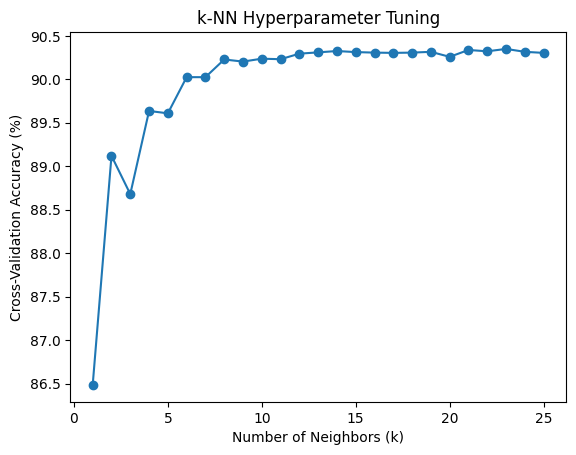

Confusion Matrix (k-NN):
[[7175  135]
 [ 668  260]]
k-NN Accuracy: 90.25%
k-NN Cross-Validation Score: 0.90


In [20]:
X_train_imputed_knn = imputer.fit_transform(X_train)
X_test_imputed_knn = imputer.transform(X_test)

neighbors = np.arange(1, 26) 
cv_scores = [] 

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train_imputed_knn, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} Accuracy: {scores.mean() * 100:.2f}% (+/- {scores.std() * 100:.2f}%)")

optimal_k = neighbors[np.argmax(cv_scores)]
print(f"\nOptimal Number of Neighbors: {optimal_k} with {max(cv_scores):.1f}% accuracy")

plt.plot(neighbors, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy (%)')
plt.title('k-NN Hyperparameter Tuning')
plt.show()
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_imputed_knn, y_train)

knnpred = knn.predict(X_test_imputed_knn)

print("Confusion Matrix (k-NN):")
print(confusion_matrix(y_test, knnpred))
print(f"k-NN Accuracy: {round(accuracy_score(y_test, knnpred) * 100, 2)}%")

KNNCV = cross_val_score(knn, X_test_imputed_knn, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print(f"k-NN Cross-Validation Score: {KNNCV:.2f}")

# Task 23

In [21]:
models = pd.DataFrame({
    'Models': ['Logistic Regression', 'k-Nearest Neighbors'],
    'Score': [LOGCV, KNNCV]
})

models = models.sort_values(by='Score', ascending=False)
print("\nModel Performance Comparison:")
print(models)


Model Performance Comparison:
                Models     Score
0  Logistic Regression  0.903981
1  k-Nearest Neighbors  0.899853
